Technological Institute of the Philippines | Quezon City - Computer Engineering
--- | ---
Course Code: | CPE 019
Code Title: | Emerging Technologies in CpE 2
2nd Semester | AY 2023-2024
<hr> | <hr>
<u>**Assignment 10.2** | ARIMA Model
**Name** | Buenafe, Dhafny S.
**Section** | CPE32S3
**Date Performed**: |May 3, 2024
**Date Submitted**: |May 4, 2024
**Instructor**: | Engr. Roman Richard

<hr>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sys
import statsmodels as s

%matplotlib inline

###Load the time series

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 10.2 /data.csv', index_col = 'Month', parse_dates = True)

In [ ]:
data.head()

,CO2 (ppm)
Month,
1965-01-01,319.32
1965-02-01,320.36
1965-03-01,320.82
1965-04-01,322.06
1965-05-01,322.17


### Visualize the time series

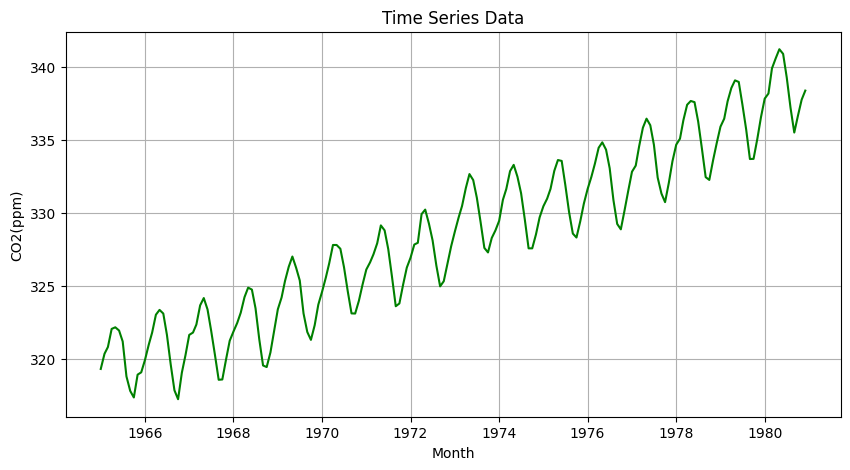

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['CO2 (ppm)'], color='green', linestyle='-')
plt.title('Time Series Data')
plt.xlabel('Month')
plt.ylabel('CO2(ppm)')
plt.grid(True)
plt.show()

- The graph shows that the CO2 (ppm) is fluctuating, but we can still observe that it is increasing over time.

### Fit an ARIMA Model (baseline model order = (1,1,1))

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1,1,1))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -225.819
Date:                Fri, 03 May 2024   AIC                            457.638
Time:                        04:46:22   BIC                            467.395
Sample:                    01-01-1965   HQIC                           461.590
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5590      0.087      6.441      0.000       0.389       0.729
ma.L1          0.3307      0.092      3.613      0.000       0.151       0.510
sigma2         0.6202      0.071      8.704      0.0

###Improve the ARIMA Model

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(data, order=(1,2,3))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


### Print the model summary


In [ ]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              CO2 (ppm)   No. Observations:                  192
Model:                 ARIMA(1, 2, 3)   Log Likelihood                -215.841
Date:                Fri, 03 May 2024   AIC                            441.682
Time:                        04:47:07   BIC                            457.917
Sample:                    01-01-1965   HQIC                           448.259
                         - 12-01-1980                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3825      0.140      2.724      0.006       0.107       0.658
ma.L1         -0.4704     22.759     -0.021      0.984     -45.077      44.136
ma.L2         -0.1176     11.997     -0.010      0.9

###Make a forecast (steps=10)

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

model = ARIMA(train_data, order=(9, 2, 0))
results = model.fit()
predictions = results.predict(start=len(train_data), end=len(data)-1, dynamic=False, typ='levels')
rmse = sqrt(mean_squared_error(test_data, predictions))
print('Test RMSE: %.3f' % rmse)

# Forecast the next 10 steps
forecast_steps = 10
forecast = results.forecast(steps=forecast_steps)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Test RMSE: 1.072


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
print("MSE: ", mean_squared_error(test_data, predictions))
print("RMSE: ", sqrt(mean_squared_error(test_data, predictions)))

MSE:  1.1498843083979555
RMSE:  1.0723265866320557


In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
1977-01-01    332.971909
1977-02-01    334.032622
1977-03-01    334.720237
1977-04-01    335.429513
1977-05-01    335.757652
1977-06-01    335.160883
1977-07-01    333.653973
1977-08-01    332.053453
1977-09-01    331.066366
1977-10-01    331.134748
Freq: MS, Name: predicted_mean, dtype: float64


### Plot the forecast

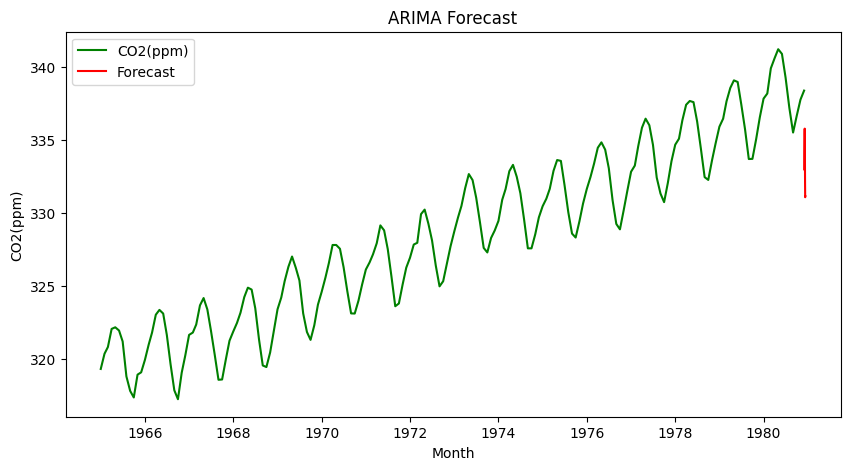

In [ ]:
plt.figure(figsize=(10, 5))

plt.plot(data.index, data.values, color='green', label='CO2(ppm)')

forecast_index = pd.date_range(start=data.index[-1], periods=forecast_steps+1, freq=data.index.freq)[1:]
plt.plot(forecast_index, forecast, color='red', label='Forecast')
plt.xlabel('Month')
plt.ylabel('CO2(ppm)')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

- The graph indicates a consistent rise in CO2(ppm) over time. The forecast, depicted by the red line, shows that this upward trend is likely to continue.

###Perform a grid search

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(data) * 0.75)
  train_data, test_data = data[0:train_size], data[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(data), len(data)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

In [ ]:
def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(data, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
p_values = range(0,11)
d_values = range(0, 4)
q_values = range(0, 4)
warnings.filterwarnings("ignore")
evaluate_models(data.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=107.199
ARIMA(0, 0, 1) MSE=106.494
ARIMA(0, 0, 2) MSE=106.042
ARIMA(0, 0, 3) MSE=105.846
ARIMA(0, 1, 0) MSE=26.634
ARIMA(0, 1, 1) MSE=23.951
ARIMA(0, 1, 2) MSE=20.025
ARIMA(0, 1, 3) MSE=18.380
ARIMA(0, 2, 0) MSE=1059.451
ARIMA(0, 2, 1) MSE=942.369
ARIMA(0, 2, 2) MSE=998.307
ARIMA(0, 2, 3) MSE=6.025
ARIMA(0, 3, 0) MSE=1432.028
ARIMA(0, 3, 1) MSE=1128.208
ARIMA(0, 3, 2) MSE=945.481
ARIMA(0, 3, 3) MSE=1022.852
ARIMA(1, 0, 0) MSE=62.368
ARIMA(1, 0, 1) MSE=72.465
ARIMA(1, 0, 2) MSE=81.394
ARIMA(1, 0, 3) MSE=91.863
ARIMA(1, 1, 0) MSE=8.619
ARIMA(1, 1, 1) MSE=13.928
ARIMA(1, 1, 2) MSE=14.918
ARIMA(1, 1, 3) MSE=18.170
ARIMA(1, 2, 0) MSE=1065.125
ARIMA(1, 2, 1) MSE=1008.356
ARIMA(1, 2, 2) MSE=4.099
ARIMA(1, 2, 3) MSE=4.275
ARIMA(1, 3, 0) MSE=75819.084
ARIMA(1, 3, 1) MSE=1087.634
ARIMA(1, 3, 2) MSE=1026.289
ARIMA(1, 3, 3) MSE=1016.551
ARIMA(2, 0, 0) MSE=97.612
ARIMA(2, 0, 1) MSE=95.559
ARIMA(2, 0, 2) MSE=94.688
ARIMA(2, 0, 3) MSE=36.992
ARIMA(2, 1, 0) MSE=23.998
ARIMA(2, 1, 1)

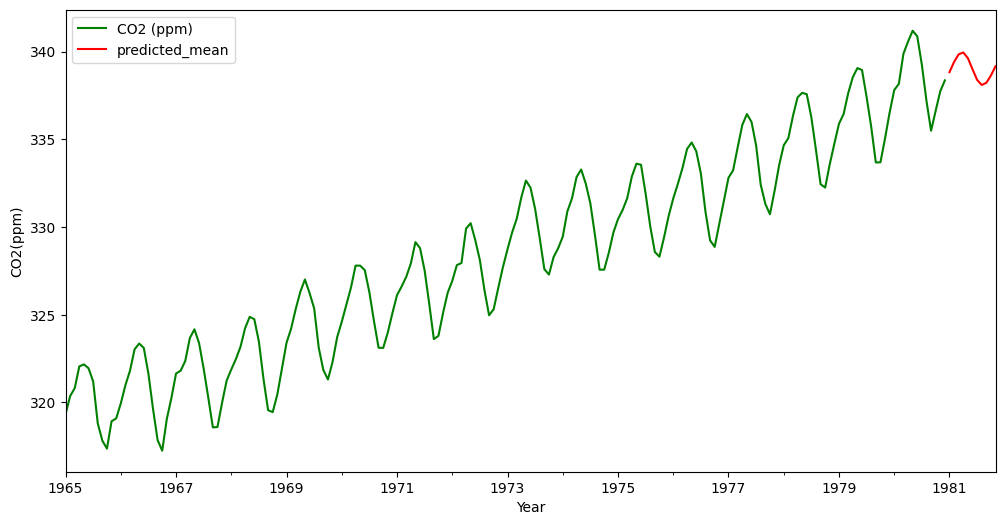

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

train_size = int(len(data) * 0.75)
train_data, test_data = data[0:train_size], data[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (9,2,0))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(data), len(data)+10, typ = 'levels')

ylabel='CO2(ppm)'
xlabel='Year'

ax = data['CO2 (ppm)'].plot(legend=True,color='green', figsize=(12,6))
forecast.plot(color='red',legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

The graph shows changes in the concentration of carbon dioxide in the atmosphere over time. The data points represent actual CO2 concentrations measured in each year, and the line represents the predicted average CO2 concentration over time. It also have some flactuation between years.

##Supplementary Activity

In [ ]:
temperature = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 10.2 /dataset_temperature.csv', index_col = ('Month'), parse_dates=True)

In [ ]:
temperature.head()

,Mean monthly temperature
Month,
1907-01,33.3
1907-02,46
1907-03,43
1907-04,55
1907-05,51.8


In [ ]:
temperature.drop(temperature[temperature['Mean monthly temperature'] == '1907 ? 1972'], inplace = True)

In [ ]:
temperature.dropna(inplace = True)
temperature = temperature.astype(float)

<Axes: xlabel='Month'>

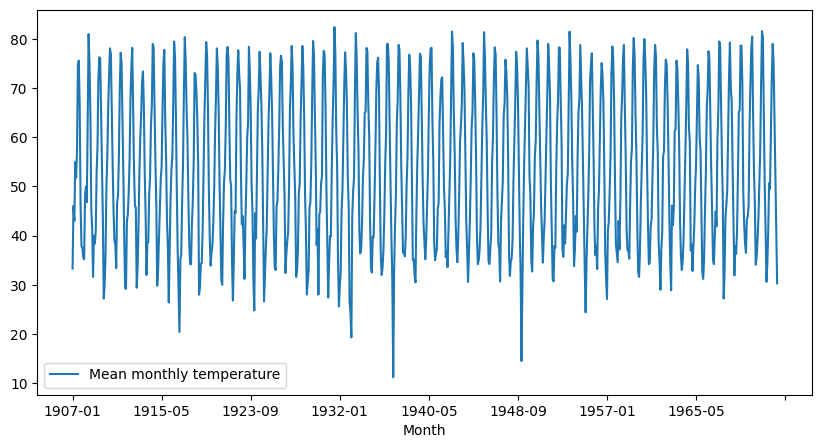

In [ ]:
temperature.plot(figsize = (10,5))

- The monthly mean of the temperature is flactuating

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(temperature, order=(1,1,1))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 1, 1)   Log Likelihood               -2773.596
Date:                      Sat, 04 May 2024   AIC                           5553.192
Time:                              12:01:08   BIC                           5567.212
Sample:                          01-01-1907   HQIC                          5558.581
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5458      0.060      9.104      0.000       0.428       0.663
ma.L1         -0.0333      0.072     -0.462      0.644      -0.174       0.108
sigm

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(temperature, order=(1,2,3))
model_fit = model.fit()

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                  SARIMAX Results                                   
Dep. Variable:     Mean monthly temperature   No. Observations:                  792
Model:                       ARIMA(1, 2, 3)   Log Likelihood               -2754.869
Date:                      Sat, 04 May 2024   AIC                           5519.738
Time:                              12:03:03   BIC                           5543.098
Sample:                          01-01-1907   HQIC                          5528.717
                               - 12-01-1972                                         
Covariance Type:                        opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4445      0.087      5.080      0.000       0.273       0.616
ma.L1         -0.9817      4.320     -0.227      0.820      -9.448       7.485
ma.L

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

X = temperature.values
size = int(len(X) * 0.80)
train, test = X[0:size], X[size:len(X)]

start = len(train)
end=len(train)+len(test)-1

model = ARIMA(train, order = (8,0,2))
results = model.fit()

predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(temperature), len(temperature)+10, typ = 'levels')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['type']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [ ]:
print("MSE: ", mean_squared_error(test, predictions))
print("RMSE: ", sqrt(mean_squared_error(test, predictions)))

MSE:  14.803517780691934
RMSE:  3.8475339869443563


In [ ]:
print("Forecast (steps = 10)")
print(forecast)

Forecast (steps = 10)
[33.7958726  34.42832952 39.42993677 47.91860717 58.31594722 68.08397266
 74.17725178 74.30582965 68.21442921 57.96914193 46.96310706]


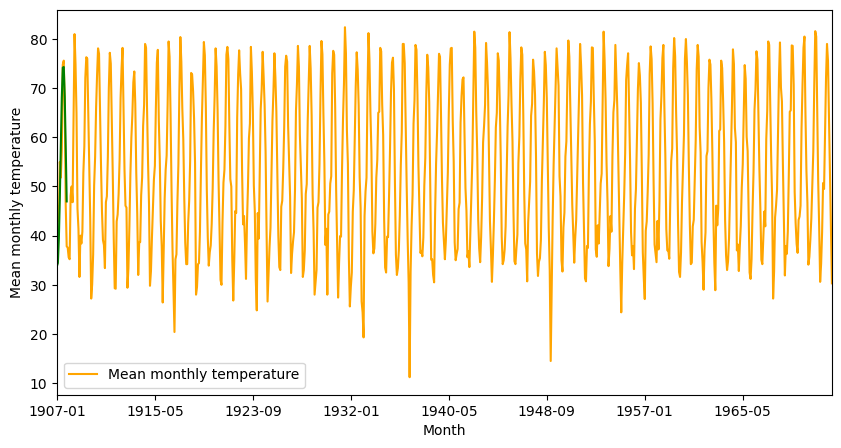

In [ ]:
import matplotlib.ticker as ticker
formatter = ticker.StrMethodFormatter('{x:,.0f}')

xlabel='Month'
ylabel='Mean monthly temperature'


ax = temperature['Mean monthly temperature'].plot(legend=True,color = 'orange',figsize=(10,5))
ax.plot(forecast,color = 'green', label='Forecast')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter)

In [ ]:
def evaluate_arima_model(dataset, arima_order):
  train_size = int(len(temperature) * 0.80)
  train_data, test_data = temperature[0:train_size], temperature[train_size:]

  start = len(train_data)
  end=len(train_data)+len(test_data)-1

  model = ARIMA(train_data, order = arima_order)
  results = model.fit()
  forecast = results.predict(len(temperature), len(temperature)+10, typ = 'levels')
  predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
  mse = mean_squared_error(test_data, predictions)
  return mse

def evaluate_models(dataset, p_values, d_values, q_values):
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)
                try:
                    mse = evaluate_arima_model(temperature, order)
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.3f' % (order,mse))
                except:
                    continue
    print('Best ARIMA=%s MSE=%.3f' % (best_cfg, best_score))

In [ ]:
import warnings
p_values = range(0,10)
d_values = range(0, 8)
q_values = range(0, 8)
warnings.filterwarnings("ignore")
evaluate_models(temperature.values, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=239.645
ARIMA(0, 0, 1) MSE=239.625
ARIMA(0, 0, 2) MSE=239.871
ARIMA(0, 0, 3) MSE=239.082
ARIMA(0, 0, 4) MSE=237.563
ARIMA(0, 0, 5) MSE=235.321
ARIMA(0, 0, 6) MSE=233.120
ARIMA(0, 0, 7) MSE=232.736
ARIMA(0, 1, 0) MSE=369.864
ARIMA(0, 1, 1) MSE=295.323
ARIMA(0, 1, 2) MSE=249.770
ARIMA(0, 1, 3) MSE=239.871
ARIMA(0, 1, 4) MSE=381.368
ARIMA(0, 1, 5) MSE=237.559
ARIMA(0, 1, 6) MSE=236.035
ARIMA(0, 1, 7) MSE=235.142
ARIMA(0, 2, 0) MSE=1085811.414
ARIMA(0, 2, 1) MSE=663131.100
ARIMA(0, 2, 2) MSE=1281787.785
ARIMA(0, 2, 3) MSE=288.535
ARIMA(0, 2, 4) MSE=248.759
ARIMA(0, 2, 5) MSE=310.195
ARIMA(0, 2, 6) MSE=263.719
ARIMA(0, 2, 7) MSE=236.773
ARIMA(0, 3, 0) MSE=2045347470.051
ARIMA(0, 3, 1) MSE=1579176.781
ARIMA(0, 3, 2) MSE=966302.468
ARIMA(0, 3, 3) MSE=1793445.060
ARIMA(0, 3, 4) MSE=248.911
ARIMA(0, 3, 5) MSE=1793.671
ARIMA(0, 3, 6) MSE=6907657.693
ARIMA(0, 3, 7) MSE=10198069.491
ARIMA(0, 4, 0) MSE=254986643806.111
ARIMA(0, 4, 1) MSE=1782063126.848
ARIMA(0, 4, 2) MSE=48300622

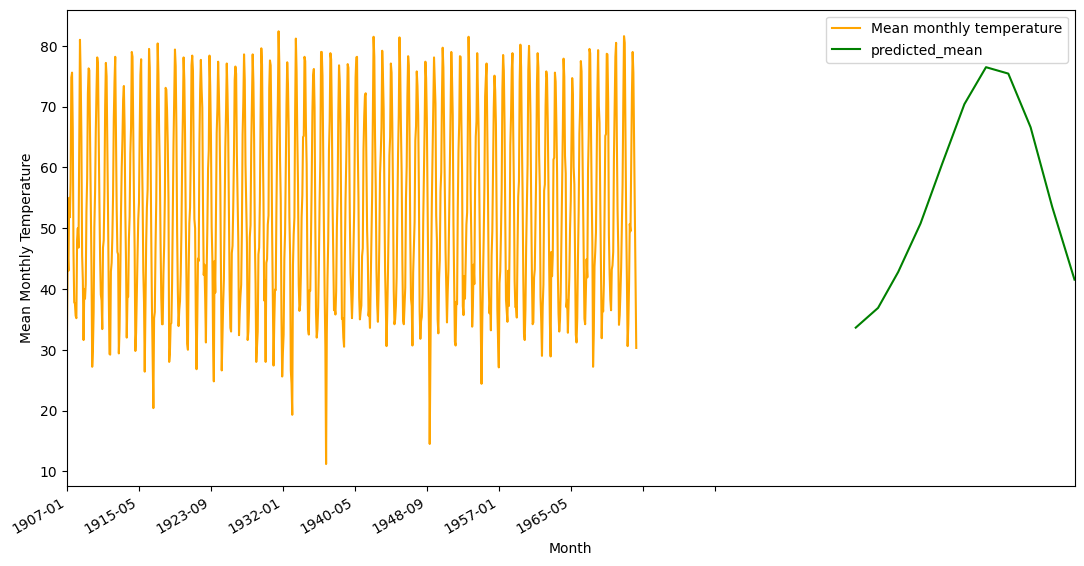

In [ ]:
train_size = int(len(temperature) * 0.80)
train_data, test_data = temperature[0:train_size], temperature[train_size:]

start = len(train_data)
end=len(train_data)+len(test_data)-1
model = ARIMA(train_data, order = (6,1,7))
results = model.fit()
predictions = results.predict(start=start, end=end, dynamic=False, type='levels')
forecast = results.predict(len(temperature), len(temperature)+10, typ = 'levels')

ylabel='Mean Monthly Temperature'
xlabel='Month'

ax = temperature['Mean monthly temperature'].plot(legend=True,color='orange',figsize=(13,7))
forecast.plot(legend=True,color='green')
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.yaxis.set_major_formatter(formatter);

From the graph, it shows that the average monthly temperature follows a seasonal pattern, with temperatures rising in the summer months and falling in the winter months. The predicted average monthly temperature (green line) appears to generally follow the same seasonal pattern as the actual average monthly temperature (yellow line). The best ARIMA=(6, 1, 7) MSE=10.623